## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,  StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, make_scorer, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

## Loading the Dataset

In [3]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
df.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
dtype: int64

## Data Visualization

<Axes: xlabel='y', ylabel='count'>

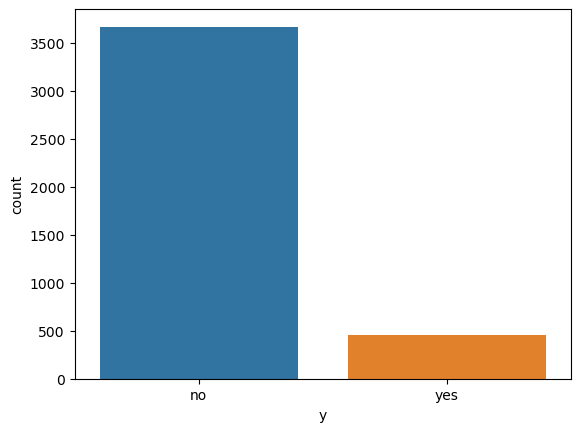

In [7]:
sns.countplot(x = df['y'])

<Axes: xlabel='age', ylabel='Density'>

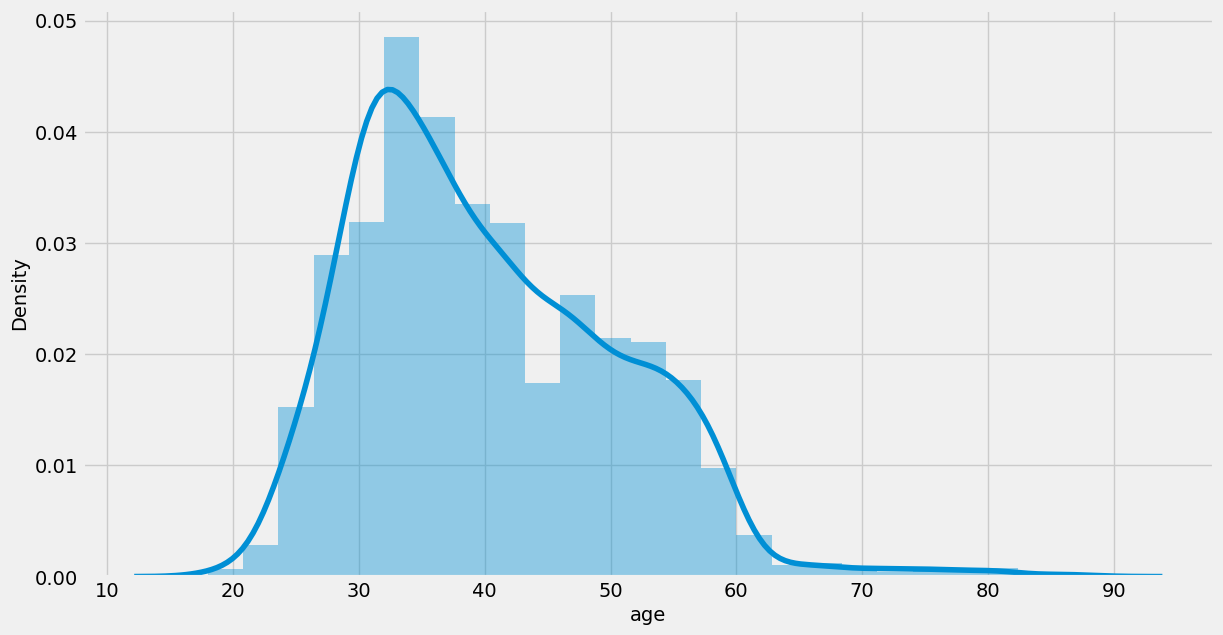

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['age'], bins=25)

[Text(0, 0, 'blue-collar'),
 Text(1, 0, 'services'),
 Text(2, 0, 'admin.'),
 Text(3, 0, 'entrepreneur'),
 Text(4, 0, 'self-employed'),
 Text(5, 0, 'technician'),
 Text(6, 0, 'management'),
 Text(7, 0, 'student'),
 Text(8, 0, 'retired'),
 Text(9, 0, 'housemaid'),
 Text(10, 0, 'unemployed'),
 Text(11, 0, 'unknown')]

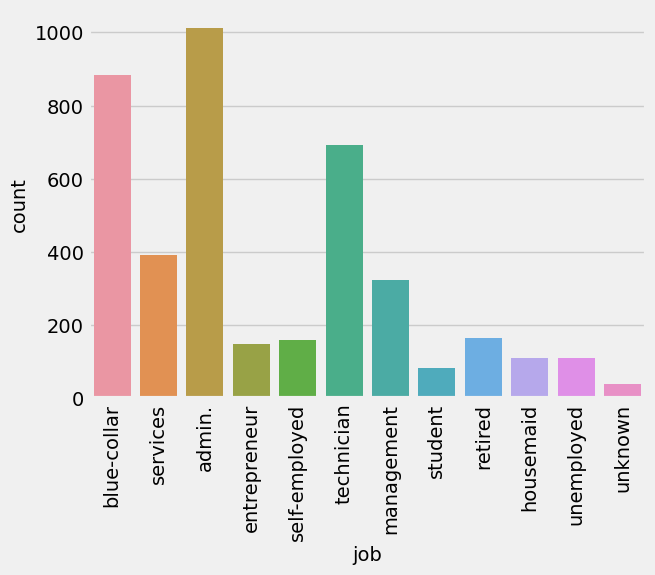

In [9]:
ax = sns.countplot(x = df['job'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: xlabel='marital', ylabel='count'>

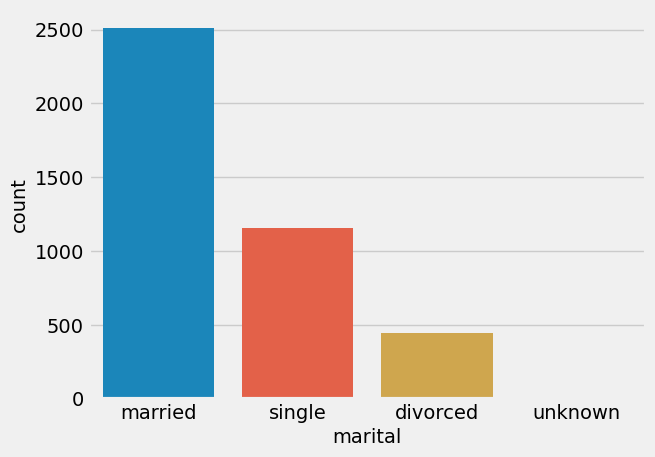

In [10]:
sns.countplot(x = df['marital'])

In [11]:
illiterate_count = df[df['marital'] == 'unkonwn'].shape[0]
print("Number of marital unkonwn people:", illiterate_count)

Number of marital unkonwn people: 0


[Text(0, 0, 'basic.9y'),
 Text(1, 0, 'high.school'),
 Text(2, 0, 'university.degree'),
 Text(3, 0, 'professional.course'),
 Text(4, 0, 'basic.6y'),
 Text(5, 0, 'basic.4y'),
 Text(6, 0, 'unknown'),
 Text(7, 0, 'illiterate')]

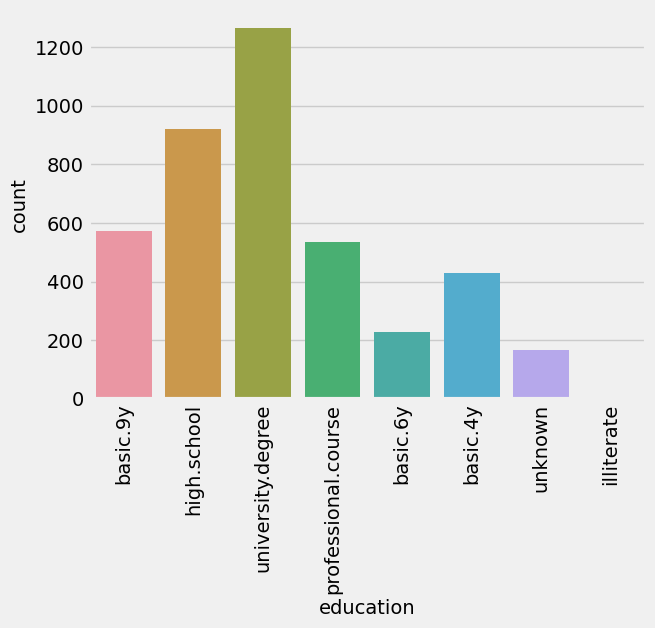

In [12]:
ax = sns.countplot(x = df['education'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [13]:
illiterate_count = df[df['education'] == 'illiterate'].shape[0]
print("Number of illiterate people:", illiterate_count)

Number of illiterate people: 1


<Axes: xlabel='default', ylabel='count'>

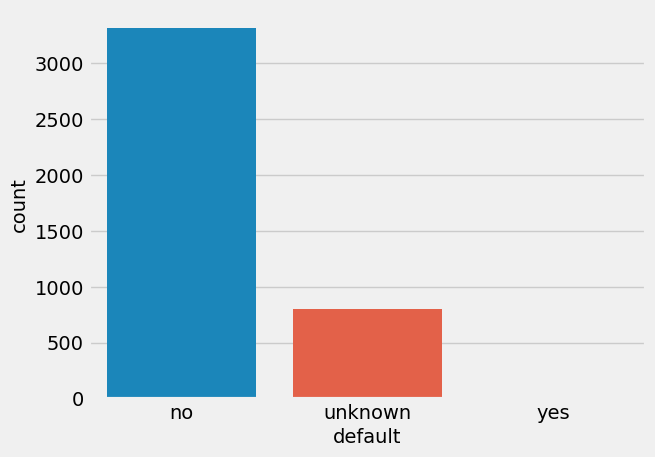

In [14]:
sns.countplot(x = df['default'])

In [15]:
illiterate_count = df[df['default'] == 'yes'].shape[0]
print("Number of people has credit in default:", illiterate_count)

Number of people has credit in default: 1


<Axes: xlabel='housing', ylabel='count'>

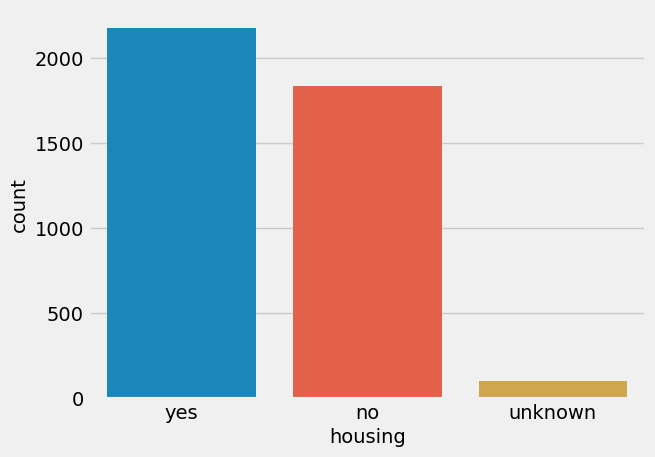

In [16]:
sns.countplot(x = df['housing'])

<Axes: xlabel='loan', ylabel='count'>

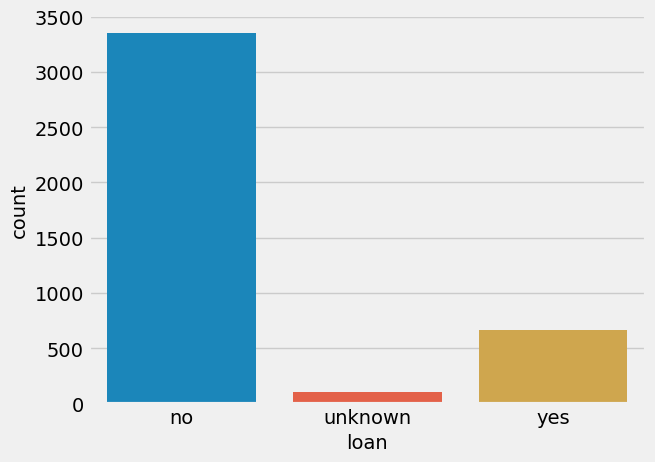

In [17]:
sns.countplot(x = df['loan'])

<Axes: xlabel='contact', ylabel='count'>

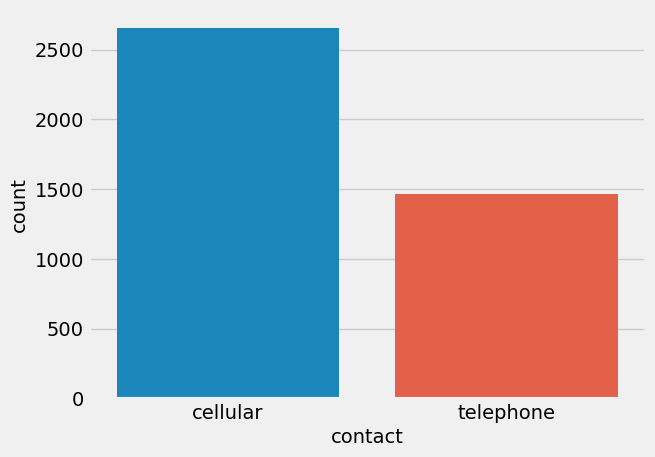

In [18]:
sns.countplot(x = df['contact'])

<Axes: xlabel='month', ylabel='count'>

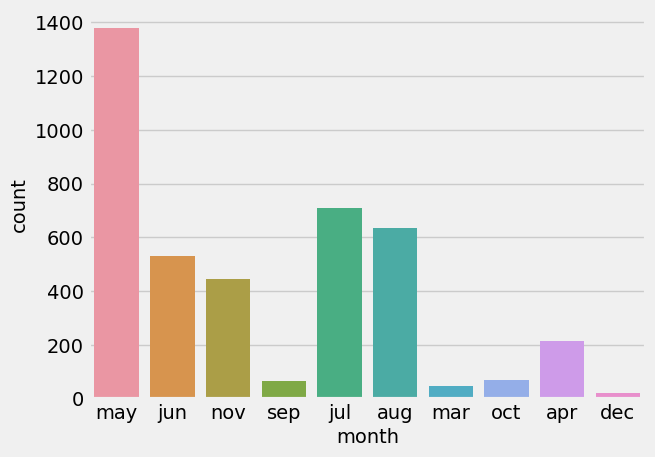

In [19]:
sns.countplot(x = df['month'])

<Axes: xlabel='day_of_week', ylabel='count'>

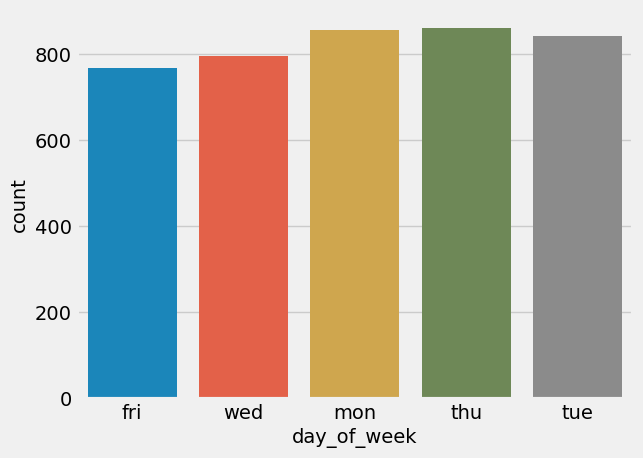

In [20]:
sns.countplot(x = df['day_of_week'])

<Axes: xlabel='duration', ylabel='Density'>

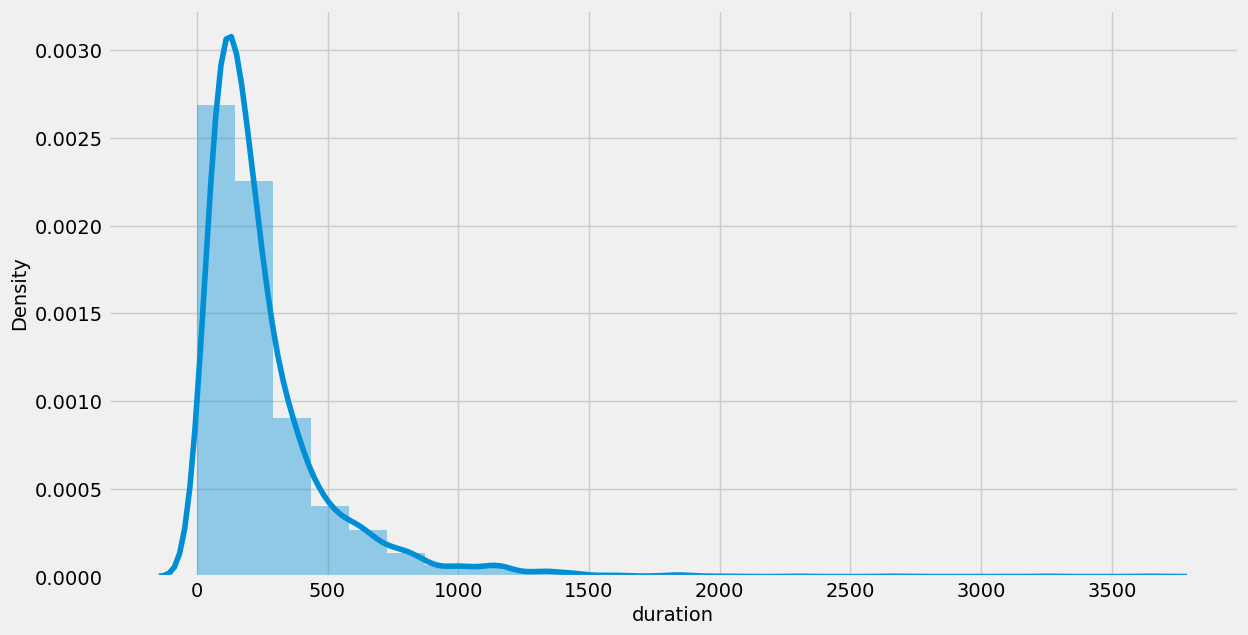

In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['duration'], bins=25)

<Axes: xlabel='campaign', ylabel='count'>

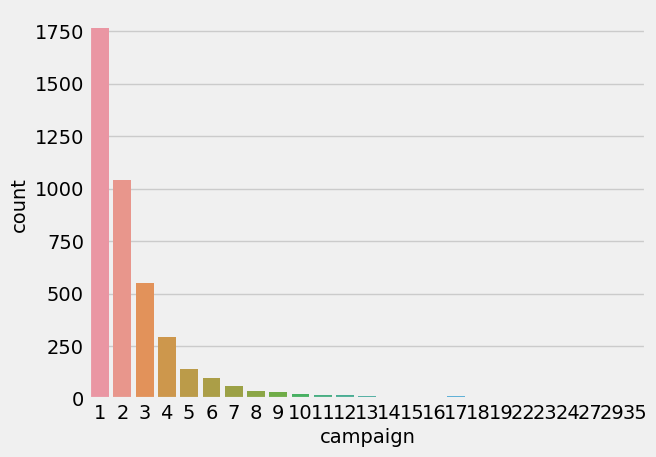

In [22]:
sns.countplot(x = df['campaign'])

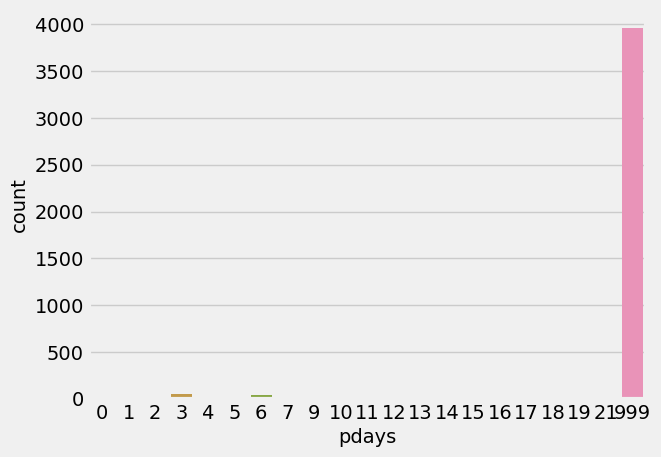

In [23]:
ax = sns.countplot(x = df['pdays'])

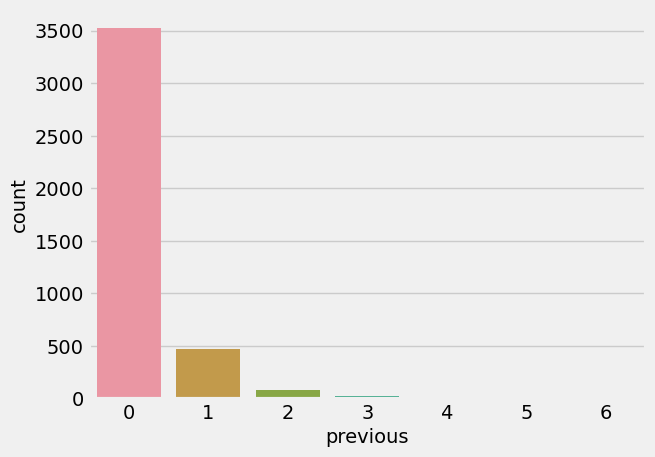

In [24]:
ax = sns.countplot(x = df['previous'])

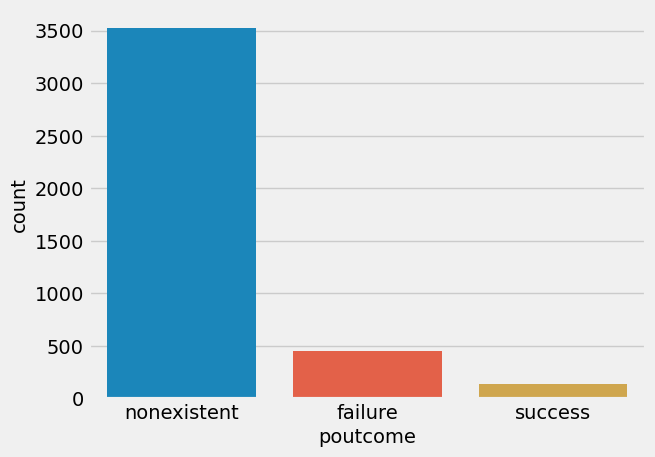

In [25]:
ax = sns.countplot(x = df['poutcome'])

<Axes: xlabel='emp.var.rate', ylabel='count'>

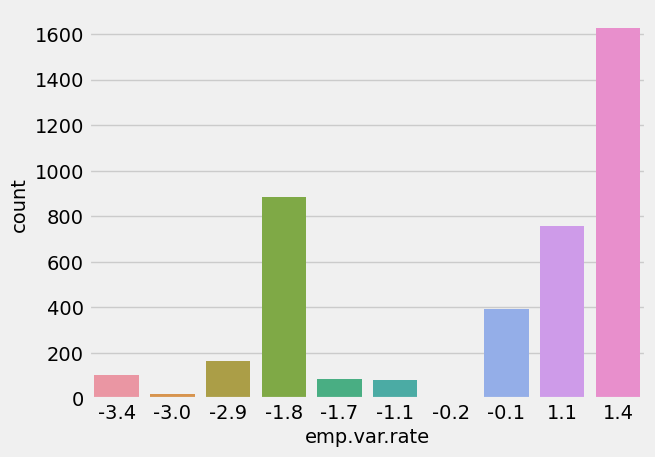

In [26]:
sns.countplot(x = df['emp.var.rate'])

[Text(0, 0, '92.201'),
 Text(1, 0, '92.379'),
 Text(2, 0, '92.431'),
 Text(3, 0, '92.469'),
 Text(4, 0, '92.649'),
 Text(5, 0, '92.713'),
 Text(6, 0, '92.756'),
 Text(7, 0, '92.843'),
 Text(8, 0, '92.893'),
 Text(9, 0, '92.963'),
 Text(10, 0, '93.075'),
 Text(11, 0, '93.2'),
 Text(12, 0, '93.369'),
 Text(13, 0, '93.444'),
 Text(14, 0, '93.749'),
 Text(15, 0, '93.798'),
 Text(16, 0, '93.876'),
 Text(17, 0, '93.918'),
 Text(18, 0, '93.994'),
 Text(19, 0, '94.027'),
 Text(20, 0, '94.055'),
 Text(21, 0, '94.199'),
 Text(22, 0, '94.215'),
 Text(23, 0, '94.465'),
 Text(24, 0, '94.601'),
 Text(25, 0, '94.767')]

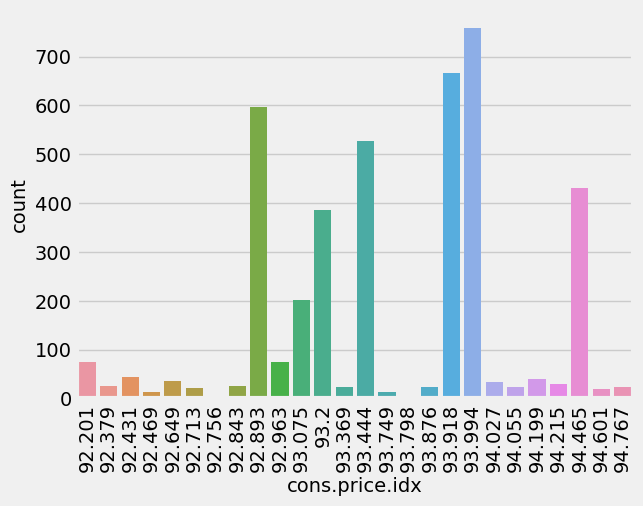

In [27]:
ax = sns.countplot(x = df['cons.price.idx'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, '-50.8'),
 Text(1, 0, '-50.0'),
 Text(2, 0, '-49.5'),
 Text(3, 0, '-47.1'),
 Text(4, 0, '-46.2'),
 Text(5, 0, '-45.9'),
 Text(6, 0, '-42.7'),
 Text(7, 0, '-42.0'),
 Text(8, 0, '-41.8'),
 Text(9, 0, '-40.8'),
 Text(10, 0, '-40.4'),
 Text(11, 0, '-40.3'),
 Text(12, 0, '-40.0'),
 Text(13, 0, '-39.8'),
 Text(14, 0, '-38.3'),
 Text(15, 0, '-37.5'),
 Text(16, 0, '-36.4'),
 Text(17, 0, '-36.1'),
 Text(18, 0, '-34.8'),
 Text(19, 0, '-34.6'),
 Text(20, 0, '-33.6'),
 Text(21, 0, '-33.0'),
 Text(22, 0, '-31.4'),
 Text(23, 0, '-30.1'),
 Text(24, 0, '-29.8'),
 Text(25, 0, '-26.9')]

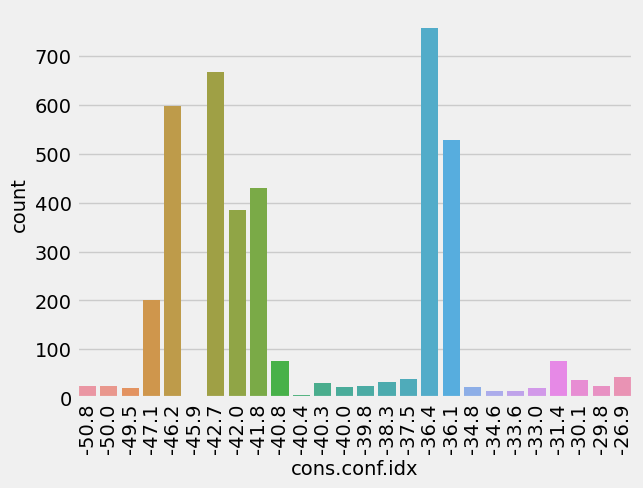

In [28]:
ax = sns.countplot(x = df['cons.conf.idx'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: xlabel='euribor3m', ylabel='Density'>

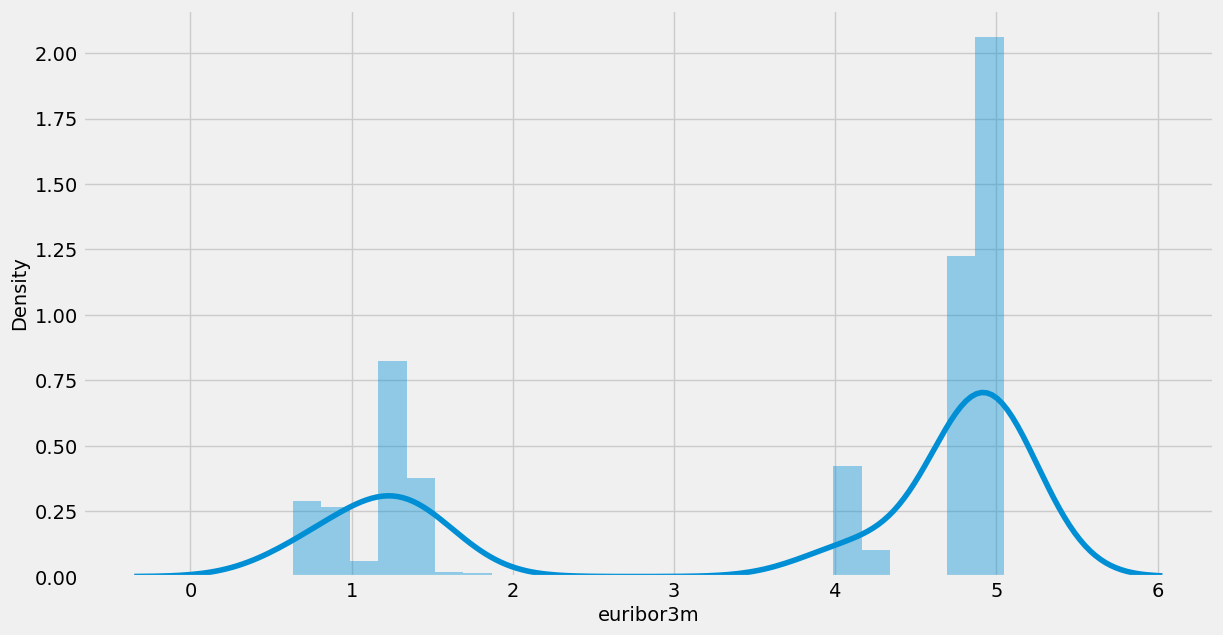

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['euribor3m'], bins=25)

[Text(0, 0, '4963.6'),
 Text(1, 0, '4991.6'),
 Text(2, 0, '5008.7'),
 Text(3, 0, '5017.5'),
 Text(4, 0, '5023.5'),
 Text(5, 0, '5076.2'),
 Text(6, 0, '5099.1'),
 Text(7, 0, '5176.3'),
 Text(8, 0, '5191.0'),
 Text(9, 0, '5195.8'),
 Text(10, 0, '5228.1')]

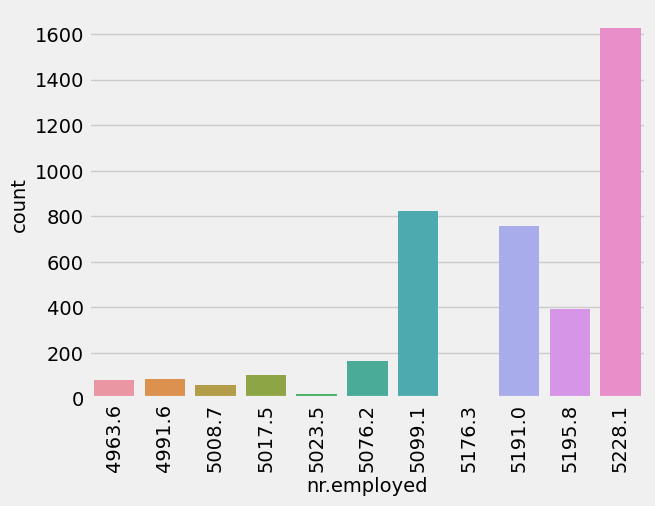

In [30]:
ax = sns.countplot(x = df['nr.employed'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## Preprocessing the dataset

### Data Cleaning

In [31]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**there is no null value in dataset so "handling missing values" is not necessary for this dataset**

In [32]:
duplicates = df.duplicated()
print(df[duplicates])

num_duplicates = sum(duplicates)
print("Number of duplicate rows:", num_duplicates)

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]
Number of duplicate rows: 0


**there is no duplicate row in dataset so "deal with duplicates" is not necessary for this dataset**

#### As a "data cleaning" step we do data formatting, we convert our dataset to csv (comma seperated value) format, converted csv file can be found in the homework zip file

### Data Preprocessing

**Creating a copy of our data cause we do not want to make change on original one**

In [33]:
df_preprocessed = df.copy()

In [34]:
month_categories = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
day_categories = ["mon","tue","wed","thu","fri","sat","sun"]

categorical_columns = ["job","marital","default","housing","loan","contact","education"]
numerical_columns = ['age', "duration",'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

preprocess = ColumnTransformer([
                             ("month_encoded",OrdinalEncoder(categories=[month_categories]),['month']),
                             ("day_encoded",OrdinalEncoder(categories=[day_categories]),['day_of_week']),
                             ('one_hot_encoder',OneHotEncoder(handle_unknown='ignore'), categorical_columns[1:]),
                             ("numeric_scaler", StandardScaler(), numerical_columns),
                             ('minmaxscaling', MinMaxScaler(), numerical_columns),
                            ])


In [35]:
X = df.drop(columns=['y'])
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
pipeline = make_pipeline(preprocess,DecisionTreeClassifier())
pipeline.fit(x_train, y_train)
preds = pipeline.predict (x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.8818770226537217
